# Исследование объявлений о продаже квартир

## Шаг 1. Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd
df=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [2]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Таблица содержит 22 колонки и 23699 строк с различными типами данных (int64, object, float64, bool).
В столбцах ceiling_height, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition есть пропуски значений.

## Шаг 2. Предобработка данных

Проверим в таблице наличие полных дубликатав

In [1091]:
print(df.duplicated().count())

23699


Дубликатов не оказалось

Преобразуем столбец last_price к типу int64

In [1092]:
df['last_price']=df['last_price'].astype('int64')

Столбцы parks_nearest, ponds_nearest, cityCenters_nearest, airports_nearest содержат пропуски, 
заполнение которых средними значениями может исказить картину. А с пропусками к типу int64 привести невозможно.
Поэтому оставил столбцы как есть

Преобразуем столбец first_day_exposition в формат даты

In [1093]:
df['first_day_exposition']=pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')

Заполним пропуски в столбце ceiling_height медианными значениями

In [1094]:
df['ceiling_height']=df['ceiling_height'].fillna(df['ceiling_height'].median())

Заполним пропуски в столбце days_exposition медианными значениями 

In [1095]:
df['days_exposition']=df['days_exposition'].fillna(df['days_exposition'].median())

Заполним пропуски в столбце balcony, parks_around3000, ponds_around3000  нулевыми значениями

In [1096]:
df['balcony']=df['balcony'].fillna(0)
df['parks_around3000']=df['parks_around3000'].fillna(0)
df['ponds_around3000']=df['ponds_around3000'].fillna(0)

Приведем столбцы parks_around3000, days_exposition, balcony , ponds_around3000  к типу int64

In [1097]:
df['balcony']=df['balcony'].astype('int64')
df['parks_around3000']=df['parks_around3000'].astype('int64')
df['ponds_around3000']=df['ponds_around3000'].astype('int64')

In [1098]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,95.0
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,NaN,...,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,NaN,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,NaN,9,NaN,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


В таблице  не оказалось полных убликатов.
Столбец first_day_exposition был приведен к формату даты.
Пропуски в столбцах balcony parks_around3000, ponds_around3000 были заполнены нулевыми значениями и приведены к типу int64.
Пропуски в столбцах days_exposition ceiling_height  были заполнены медианными значениями

In [1099]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null int64
parks_nearest           8079 non-null float64
ponds_around3

## Шаг 3. Добавим в таблицу дополнительные столбцы

Добавим столбец price_metre с ценой квадратного метра квартиры

In [1100]:
df['price_metre']=df['last_price']/df['total_area']
df['price_metre']=df['price_metre'].round(0)

Добавим столбцы dayofweek, month, year с днем недели, месяцем и годом публикации объявления

In [1101]:
df['dayofweek']= df['first_day_exposition'].dt.dayofweek
df['month']= df['first_day_exposition'].dt.month
df['year']= df['first_day_exposition'].dt.year

Добавим столбец timestamp

In [1102]:
df['timestamp']= df['first_day_exposition'].astype('int64') // 10**9

Добавим столбец с категориями этажности квартиры

In [1103]:
def floorcat(row):
    if row['floor']==1:
        return 'первый'
    if row['floors_total']==row['floor']:
        return 'последний'
    return 'другой'

df['floor_cat']=df.apply(floorcat, axis=1)

Добавим столбцы с соотношением жилой и общей площади, а также соотношением площади кухни к общей.

In [1104]:
df['living_to_total_area']=df['living_area']/df['total_area']
df['living_to_total_area']=df['living_to_total_area'].round(2)
df['kitchen_to_total_area']=df['kitchen_area']/df['total_area']
df['kitchen_to_total_area']=df['kitchen_to_total_area'].round(2)

Взглянем на результат

In [1105]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_metre,dayofweek,month,year,timestamp,floor_cat,living_to_total_area,kitchen_to_total_area
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,755.0,95.0,120370.0,3,3,2019,1551916800,другой,0.47,0.23
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,NaN,...,NaN,81.0,82921.0,1,12,2018,1543881600,первый,0.46,0.27
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,NaN,...,574.0,558.0,92786.0,3,8,2015,1440028800,другой,0.61,0.15
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,NaN,9,NaN,...,234.0,424.0,408176.0,4,7,2015,1437696000,другой,NaN,NaN
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,48.0,121.0,100000.0,1,6,2018,1529366400,другой,0.32,0.41


## Шаг 4. Проведем исследовательский анализ данных

Для дальнейших подсчетов создадим 2 переменные 
len_first - с перфоначальным количеством строк во фрейме
len_cur - с текущим количеством строк во фрейме

In [1106]:
len_first=len(df)
len_cur=len_first
print(len_first)

23699


Посмотрим на распредление площадей квартир

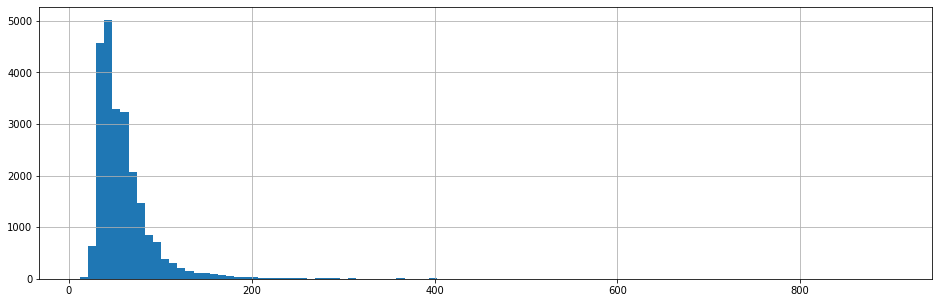

In [1107]:
df['total_area'].hist(bins=100, figsize=(16,5))

У графика очень длинный хвост с очень большими значениями.
Ограничим нашу таблицу верхним порогом площади квартиры в 300 м кв

In [1108]:
df=df[df['total_area']<300]

Сравним результат

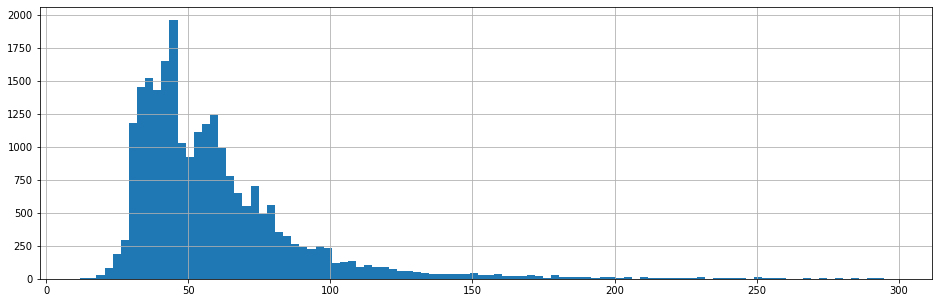

In [1109]:
df['total_area'].hist(bins=100, figsize=(16,5))

Посмотрим количество отброшенных объявлений. Их должно быть не более 5% от первоначального количества

In [1110]:
print(round((len_cur-len(df))*100/len_first ,1))
len_cur=len(df)

0.3


<font color='red'> Хорошо. </font>

Посмотрим на распредление цен на квартиры

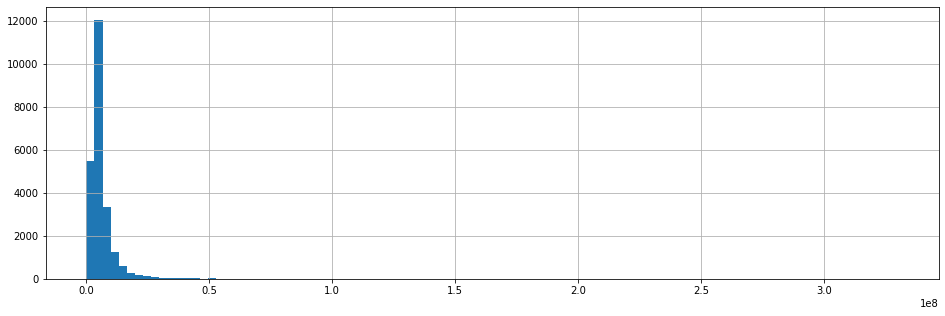

In [1111]:
df['last_price'].hist(bins=100, figsize=(16,5))

In [1112]:
df.query('last_price > 100000000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_metre,dayofweek,month,year,timestamp,floor_cat,living_to_total_area,kitchen_to_total_area
1188,20,118000000,290.6,2018-06-01,6,3.82,6.0,188.70,3,NaN,...,NaN,316.0,406056.0,4,6,2018,1527811200,другой,0.65,0.08
1300,14,120000000,280.0,2018-07-12,5,4.70,4.0,162.00,3,NaN,...,339.0,225.0,428571.0,3,7,2018,1531353600,другой,0.58,0.11
1436,19,330000000,190.0,2018-04-04,3,3.50,7.0,95.00,5,NaN,...,285.0,233.0,1736842.0,2,4,2018,1522800000,другой,0.50,0.21
1928,11,125000000,224.5,2017-01-24,4,2.65,4.0,163.50,3,False,...,497.0,174.0,556793.0,1,1,2017,1485216000,другой,0.73,0.13
2536,16,159984000,242.4,2015-08-27,4,3.85,9.0,131.00,7,NaN,...,227.0,501.0,660000.0,3,8,2015,1440633600,другой,0.54,0.08
4996,20,124000000,124.5,2017-10-12,4,3.00,4.0,67.20,2,False,...,172.0,45.0,995984.0,3,10,2017,1507766400,другой,0.54,0.16
7857,11,150000000,230.0,2017-10-25,8,2.65,8.0,220.00,8,NaN,...,NaN,135.0,652174.0,2,10,2017,1508889600,последний,0.96,NaN
8900,13,190870000,268.0,2016-03-25,3,2.65,8.0,132.00,7,NaN,...,198.0,901.0,712201.0,4,3,2016,1458864000,другой,0.49,0.15
12674,16,140000000,241.0,2015-07-24,5,3.00,5.0,NaN,4,NaN,...,83.0,399.0,580913.0,4,7,2015,1437696000,другой,NaN,NaN
13864,20,130000000,231.0,2015-08-13,6,3.60,6.0,148.00,4,NaN,...,170.0,467.0,562771.0,3,8,2015,1439424000,другой,0.64,0.05


У графика очень длинный хвост с очень большими значениями.
Ограничим нашу таблицу верхним порогом цены квартиры в 70 млн рублей

In [1113]:
df=df[df['last_price']<70000000]

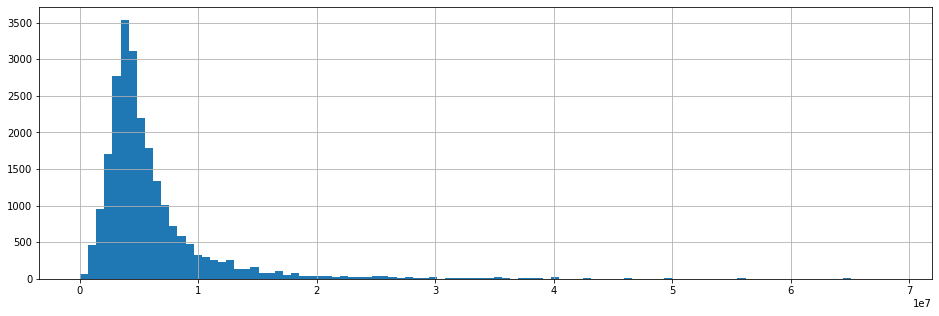

In [1114]:
df['last_price'].hist(bins=100, figsize=(16,5))

Посмотрим количество отброшенных объявлений. Их должно быть не более 5% от первоначального количества

In [1115]:
print(round((len_cur-len(df))*100/len_first ,1))
len_cur=len(df)

0.2


Посмотрим на распредление цен за квадратный метр

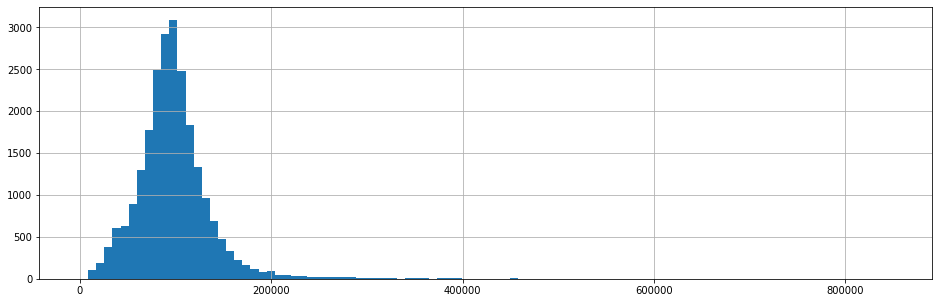

In [1116]:
df['price_metre'].hist(bins=100, figsize=(16,5))

У графика очень длинный хвост с очень большими значениями.
Ограничим нашу таблицу верхним порогом цены кв метра в 400 000 рублей

In [1117]:
df=df[df['price_metre']<400000]

Посмотрим количество отброшенных объявлений. Их должно быть не более 5% от первоначального количества

In [1118]:
print(round((len_cur-len(df))*100/len_first ,1))
len_cur=len(df)

0.1


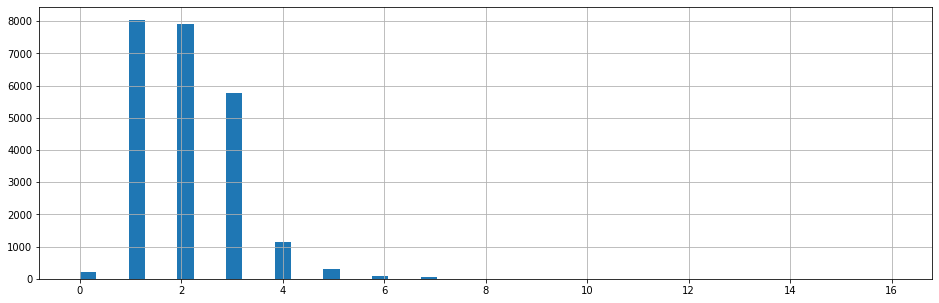

In [1119]:
df['rooms'].hist(bins=50, figsize=(16,5))

У графика очень длинный хвост с очень большими значениями.
Ограничим нашу таблицу верхним количеством комнат 10

In [1120]:
df=df[df['rooms']<12]

Сравним результат

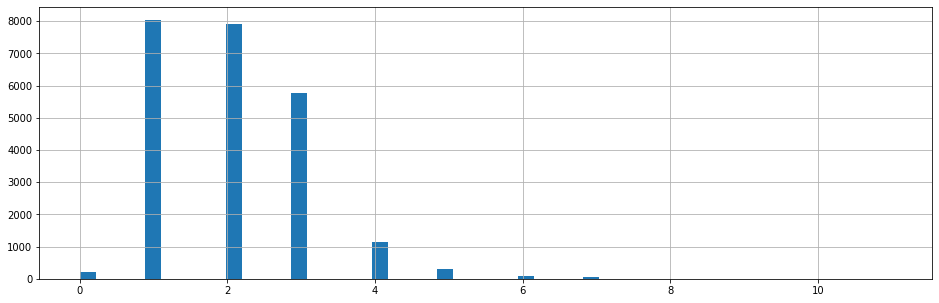

In [1121]:
df['rooms'].hist(bins=50, figsize=(16,5))

Посмотрим на количество отброшенных объявлений. Их должно быть не более 5% от первоначального количества

In [1122]:
print(round((len_cur-len(df))*100/len_first ,1))
len_cur=len(df)

0.0


<font color='red'> Хорошо. </font>

Посмотрим на распредление высоты потолков квартир

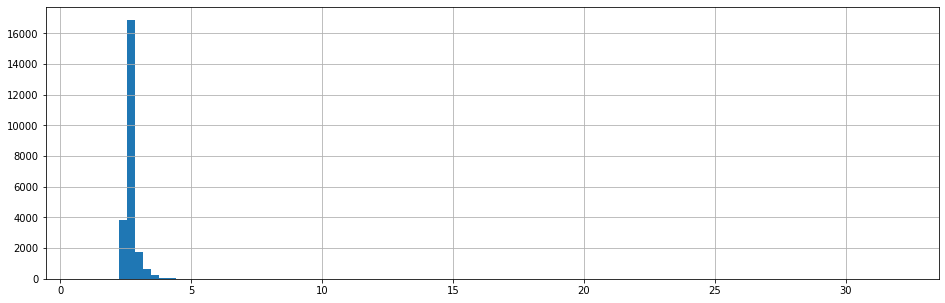

In [1123]:
df['ceiling_height'].hist(bins=100, figsize=(16,5))

У графика очень длинный хвост с очень большими значениями.
Ограничим нашу таблицу высотой потолков до 4 метров

In [1124]:
df=df[df['ceiling_height']<4]

Сравним результат

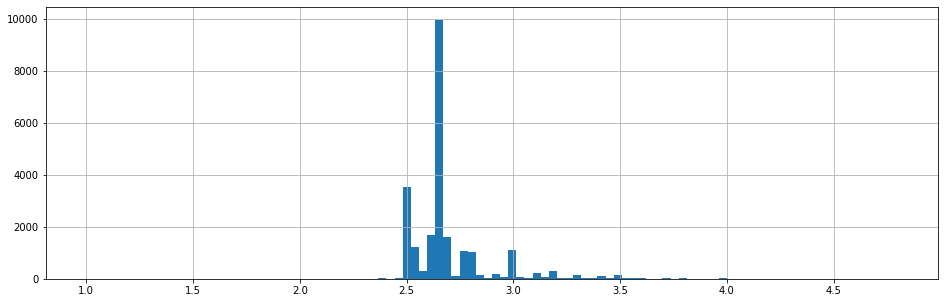

In [1125]:
df['ceiling_height'].hist(bins=100, figsize=(16,5))

Посмотрим количество отброшенных объявлений. Их должно быть не более 5% от первоначального количества

In [1126]:
print(round((len_cur-len(df))*100/len_first ,1))
len_cur=len(df)

0.1


Посмотрим на распредление даты выкладывания объявления

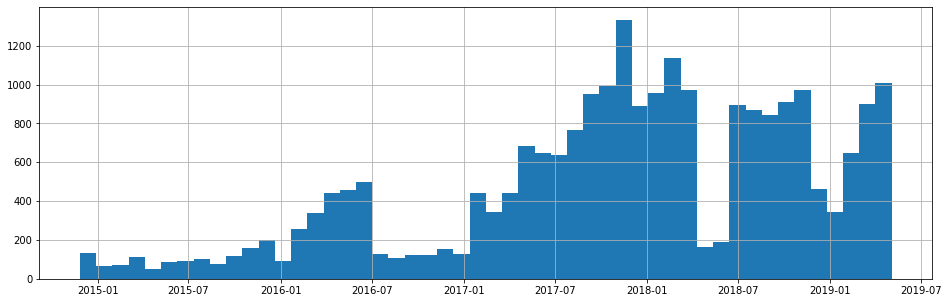

In [1127]:
df['first_day_exposition'].hist(bins=50, figsize=(16,5))

Посмотрим на распредление продолжительности работы объявления

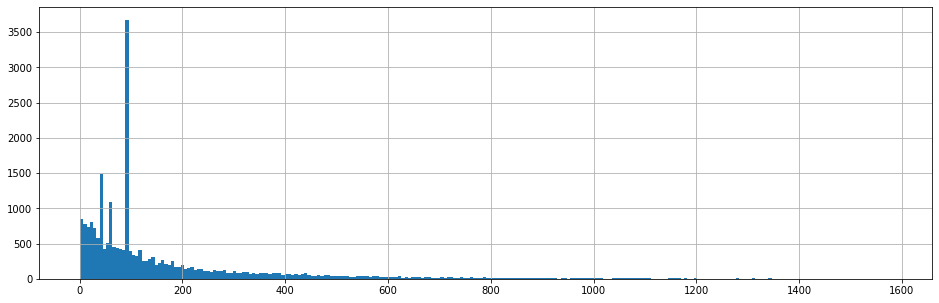

In [1128]:
df['days_exposition'].hist(bins=250, figsize=(16,5))

Посчитаем среднее для days_exposition

In [1129]:
mean_time=df['days_exposition'].mean()
print(mean_time)

168.8560738126621


Посчитаем медиану для days_exposition

In [1130]:
median_time=df['days_exposition'].median()
print(median_time)

95.0


Оставим только те строки где days_exposition меньше 500 дней.
Так свыше 500 мало значений и вероятность не продать квартиру за полтора года низкая

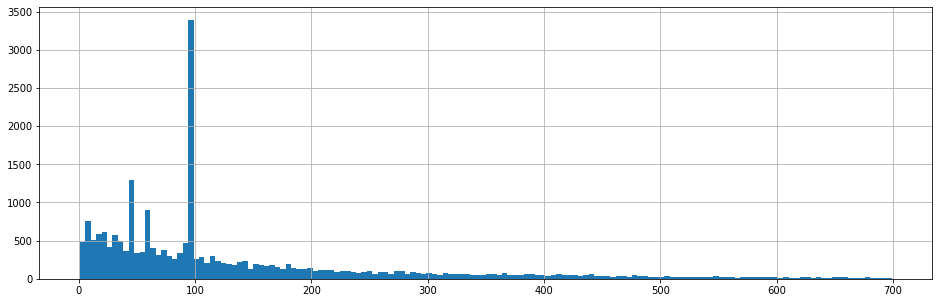

In [1131]:
df=df.query('days_exposition<700')
df['days_exposition'].hist(bins=150, figsize=(16,5))

Посмотрим количество отброшенных объявлений. Их должно быть не более 5% от первоначального количества

In [1132]:
print(round((len_cur-len(df))*100/len_first ,1))
len_cur=len(df)

3.6


Определим от чего зависит цена квартиры

Для дальнейшего удобства сравнения коэффициентов корреляции создаим фрейм df_corr

In [1133]:
df_corr = pd.DataFrame({
        'location': ['all', 'spb'],
        'rooms': [0.0, 0.0],
        'centre': [0.0, 0.0],
        'date': [0.0, 0.0]
 })

Построим график зависимости цены от общей площади квартиры.
Найдем значение корреляци

0.788

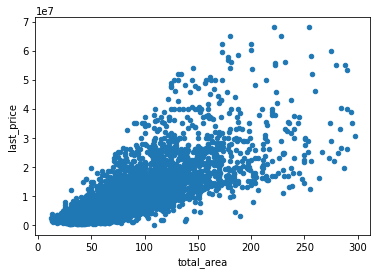

In [1134]:
df.plot(x='total_area', y='last_price', kind='scatter')
df['last_price'].corr(df['total_area']).round(3)

Построим график зависимости цены от числа комнат
Найдем значение корреляци

0.499

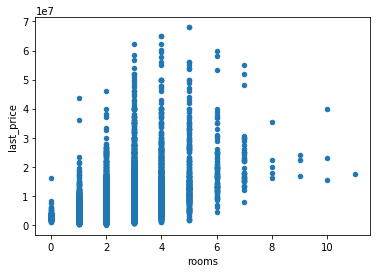

In [1135]:
df.plot(x='rooms', y='last_price', kind='scatter')
df_corr.at[0,'rooms']=df['last_price'].corr(df['rooms']).round(3)
df_corr.at[0,'rooms']

Построим график зависимости цены от удалённости от центра.
Найдем значение корреляци

-0.323

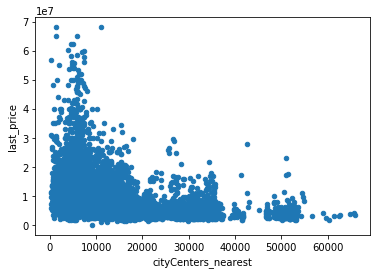

In [1136]:
df.plot(x='cityCenters_nearest', y='last_price', kind='scatter')
df_corr.at[0,'centre']=df['last_price'].corr(df['cityCenters_nearest']).round(3)
df_corr.at[0,'centre']

Построим график зависимости цены от того расположена ли квартира на первом, последнем или другом этажах.
Найдем значение корреляци

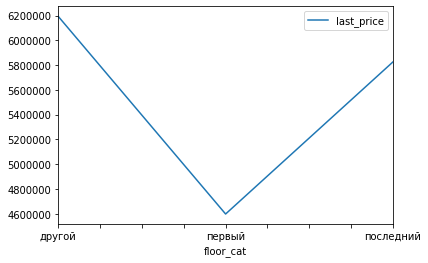

In [1137]:
df.pivot_table(index='floor_cat', values='last_price').plot()

На первом этаже квартиры продаются существенно дешевле

Построим график зависимости цены от этажа
Найдем значение корреляци

0.057

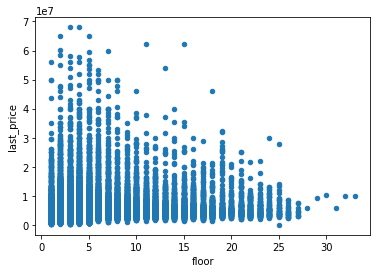

In [1138]:
df.plot(x='floor', y='last_price', kind='scatter')
df_corr.at[0,'floor']=df['last_price'].corr(df['floor']).round(3)
df_corr.at[0,'floor']

Построим график зависимости цены от даты размещения объявления
Найдем значение корреляци

-0.029

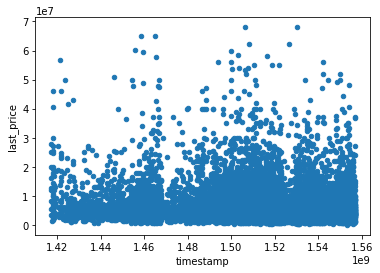

In [1139]:
df.plot(x='timestamp', y='last_price', kind='scatter')
df_corr.at[0,'date']=df['last_price'].corr(df['timestamp']).round(3)
df_corr.at[0,'date']

Построим график зависимости цены от дня недели старта объявления.
Найдем значение корреляци

-0.015

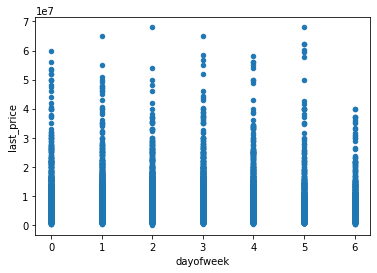

In [1140]:
df.plot(x='dayofweek', y='last_price', kind='scatter')
df['last_price'].corr(df['dayofweek']).round(3)

Построим график зависимости цены от месяца старта объявления
Найдем значение корреляци 

-0.001

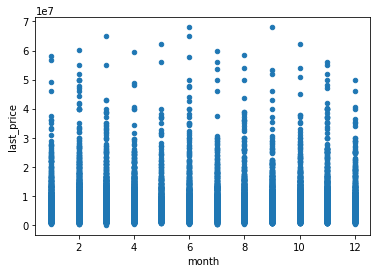

In [1141]:
df.plot(x='month', y='last_price', kind='scatter')
df['last_price'].corr(df['month']).round(3)

Построим график зависимости цены от года старта объявления
Найдем значение корреляции.

-0.028

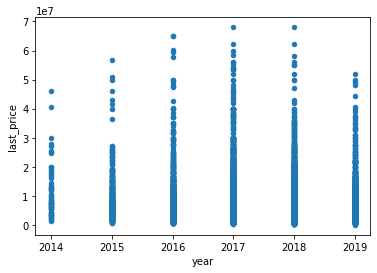

In [1142]:
df.plot(x='year', y='last_price', kind='scatter')
df['last_price'].corr(df['year']).round(3)

В таблице data_locality сгруппируем данные по населенным пунктам, рассчитаем количество обявлений 
и среднюю цену квадратного метра

In [1143]:
data_locality=df.pivot_table(index='locality_name',values='price_metre', aggfunc=['mean','count'])
data_locality.columns=['mean','count']
print(data_locality.head(10))

                        mean  count
locality_name                      
Бокситогорск    17457.333333     15
Волосово        39663.750000     32
Волхов          35052.148148    108
Всеволожск      67281.619792    384
Выборг          58197.903509    228
Высоцк          31803.000000      3
Гатчина         68950.810345    290
Зеленогорск    115122.750000     24
Ивангород       32591.964286     28
Каменногорск    27969.153846     13


Выделим населённый пункт с самой высокой стоимостью жилья и узнаем ее значение

In [1144]:
print('Максимальная стоимость жилья - ', data_locality['mean'].max())

Максимальная стоимость жилья -  168707.0


In [1145]:
data_locality.index[data_locality['mean']==data_locality['mean'].max()]

Index(['посёлок Лисий Нос'], dtype='object', name='locality_name')

Выделим населённый пункт с самой низкой стоимостью жилья и узнаем ее значение

In [1146]:
print('Минимальная стоимость жилья - ', data_locality['mean'].min())

Минимальная стоимость жилья -  11206.333333333334


In [1147]:
data_locality.index[data_locality['mean']==data_locality['mean'].min()]

Index(['деревня Старополье'], dtype='object', name='locality_name')

Выберем 10 населённых пунктов с наибольшим числом объявлений

In [1148]:
data_locality_price_metre=data_locality.sort_values(by='count', ascending=False).head(10)
print(data_locality_price_metre)

                            mean  count
locality_name                          
Санкт-Петербург    111942.762226  14968
посёлок Мурино      85819.545817    502
посёлок Шушары      78691.934579    428
Всеволожск          67281.619792    384
Пушкин             103099.284091    352
Колпино             75262.854985    331
посёлок Парголово   90017.003135    319
Гатчина             68950.810345    290
деревня Кудрово     92614.817857    280
Выборг              58197.903509    228


Выделим квартиры расположенные в Санкт-Петербурге 

In [1149]:
spb_df=df.query('locality_name=="Санкт-Петербург"').copy()

Добавим столбец с расстоянием до центра в километрах

In [1150]:
spb_df['centre_km']=spb_df['cityCenters_nearest']
spb_df['centre_km']=spb_df['centre_km']/1000
spb_df['centre_km']=spb_df['centre_km'].round(0)
spb_df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_metre,dayofweek,month,year,timestamp,floor_cat,living_to_total_area,kitchen_to_total_area,centre_km
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,95.0,120370.0,3,3,2019,1551916800,другой,0.47,0.23,16.0
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,NaN,...,558.0,92786.0,3,8,2015,1440028800,другой,0.61,0.15,14.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,121.0,100000.0,1,6,2018,1529366400,другой,0.32,0.41,8.0
7,5,7915000,71.6,2019-04-18,2,2.65,24.0,NaN,22,NaN,...,95.0,110545.0,3,4,2019,1555545600,другой,NaN,0.26,12.0
9,18,5400000,61.0,2017-02-26,3,2.50,9.0,43.6,7,NaN,...,289.0,88525.0,6,2,2017,1488067200,другой,0.71,0.11,15.0


Создадим таблицу со средней стоимостью квартиры в зависимости от удаленности

In [1151]:
spb_price=spb_df.pivot_table(index='centre_km', values='last_price', aggfunc='mean')
print(spb_price.head(10))

             last_price
centre_km              
0.0        1.601797e+07
1.0        1.329089e+07
2.0        1.205609e+07
3.0        1.008372e+07
4.0        1.111688e+07
5.0        1.217889e+07
6.0        1.188145e+07
7.0        1.185106e+07
8.0        9.115775e+06
9.0        6.974137e+06


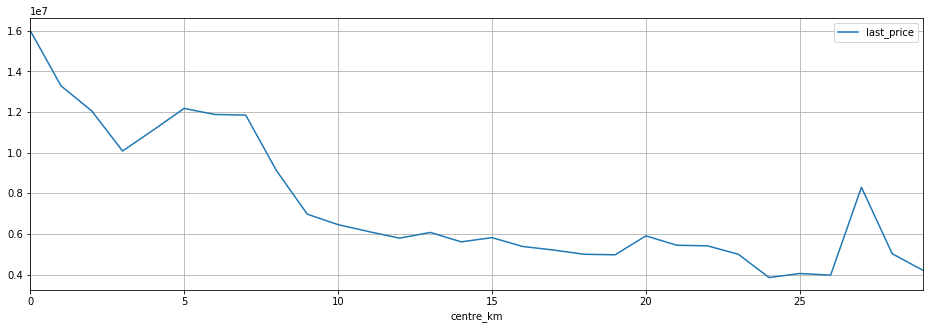

In [1152]:
spb_price.plot(grid=True, figsize=(16,5))

Взглянем на график зависимости цены квадратного метра от удаленности

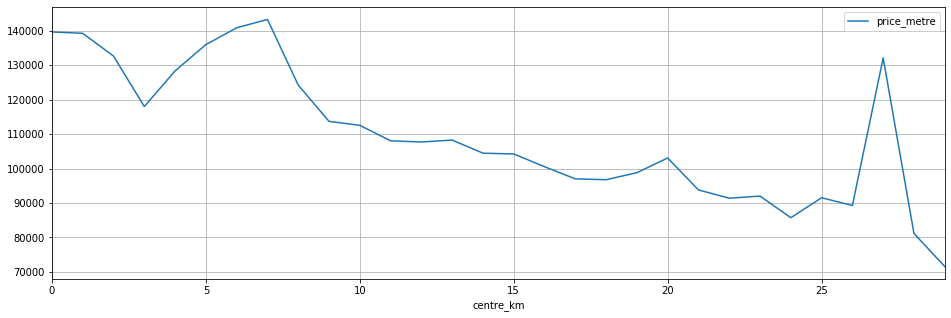

In [1153]:
spb_df.pivot_table(index='centre_km', values='price_metre', aggfunc='mean').plot(grid=True, figsize=(16,5))

Отсюда более отчетливо видно, что условный центр города находится в пределах 6-7 км

Выделим квартиры расположенные в радиусе 6 км

In [1154]:
spb_centre=spb_df.query('centre_km<=6').copy()
spb_centre.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_metre,dayofweek,month,year,timestamp,floor_cat,living_to_total_area,kitchen_to_total_area,centre_km
24,8,6500000,97.2,2015-10-31,2,2.65,3.0,46.5,1,NaN,...,265.0,66872.0,5,10,2015,1446249600,первый,0.48,0.20,2.0
35,6,15500000,149.0,2017-06-26,5,2.65,5.0,104.0,4,NaN,...,644.0,104027.0,0,6,2017,1498435200,другой,0.70,0.11,4.0
61,18,7990000,74.0,2017-08-24,2,2.65,4.0,43.0,4,NaN,...,609.0,107973.0,3,8,2017,1503532800,последний,0.58,0.27,4.0
63,2,20000000,118.0,2018-09-11,3,3.00,9.0,68.0,7,NaN,...,37.0,169492.0,1,9,2018,1536624000,другой,0.58,0.14,5.0
99,32,9600000,90.0,2017-09-26,4,2.65,5.0,67.0,2,NaN,...,104.0,106667.0,1,9,2017,1506384000,другой,0.74,0.09,3.0


Посмотрим на распределение площадей квартир

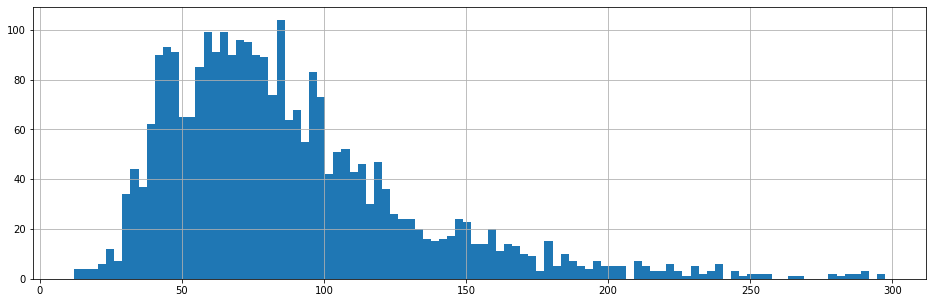

In [1155]:
spb_centre['total_area'].hist(bins=100, figsize=(16,5))

Посмотрим на распределение цен на квартиры

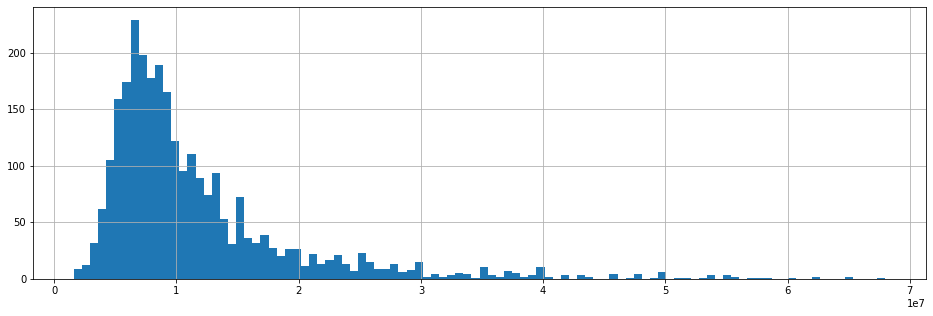

In [1156]:
spb_centre['last_price'].hist(bins=100, figsize=(16,5))

Посмотрим на распределение числа комнат в квартирах

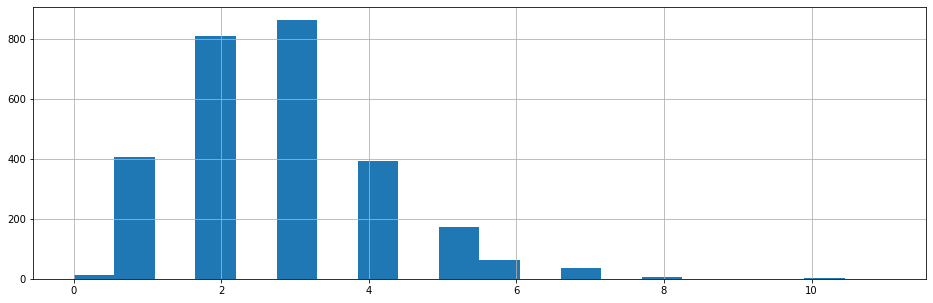

In [1157]:
spb_centre['rooms'].hist(bins=20, figsize=(16,5))

Посмотрим на распределение высоты потолков квартир

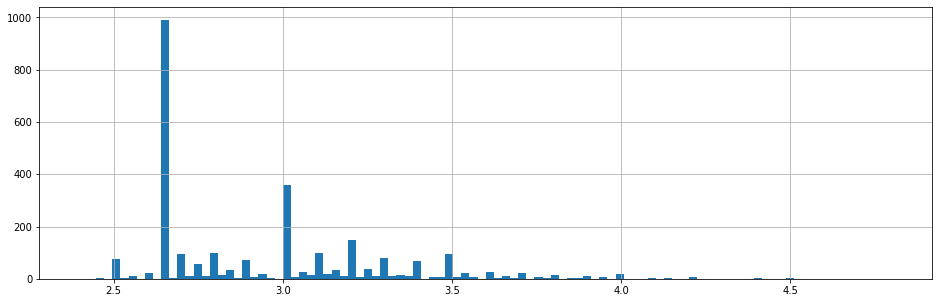

In [1158]:
spb_centre['ceiling_height'].hist(bins=100, figsize=(16,5))

Построим график зависимости цены от числа комнат
Найдем значение корреляции

0.445

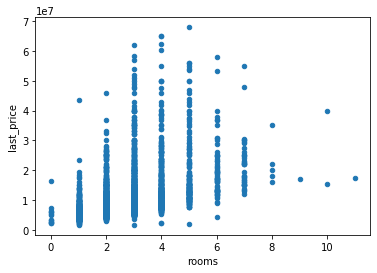

In [1159]:
spb_centre.plot(x='rooms', y='last_price', kind='scatter')
df_corr.at[1,'rooms']=spb_centre['last_price'].corr(spb_centre['rooms']).round(3)
df_corr.at[1,'rooms']

Построим график зависимости цены от этажа квартиры
Найдем значение корреляции

0.175

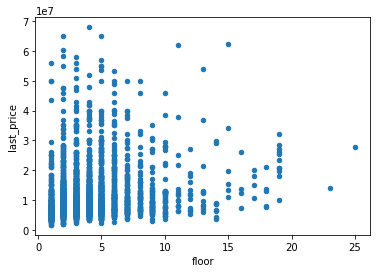

In [1160]:
spb_centre.plot(x='floor', y='last_price', kind='scatter')
df_corr.at[1,'floor']=spb_centre['last_price'].corr(spb_centre['floor']).round(3)
df_corr.at[1,'floor']

Построим график зависимости цены от удаленности от центра города.
Найдем значение корреляции

-0.004

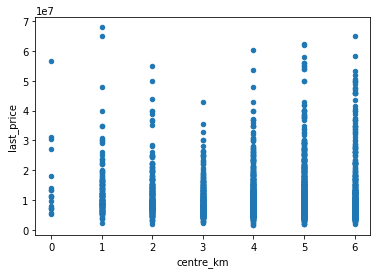

In [1161]:
spb_centre.plot(x='centre_km', y='last_price', kind='scatter')
df_corr.at[1,'centre']=spb_centre['last_price'].corr(spb_centre['centre_km']).round(3)
df_corr.at[1,'centre']

Построим график зависимости цены от даты размещения объявления
Найдем значение корреляции

-0.027

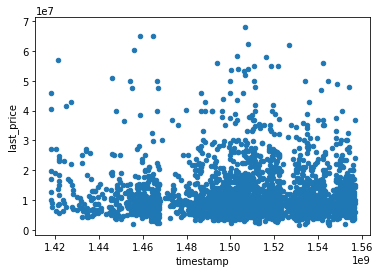

In [1162]:
spb_centre.plot(x='timestamp', y='last_price', kind='scatter')
df_corr.at[1,'date']=spb_centre['last_price'].corr(spb_centre['timestamp']).round(3)
df_corr.at[1,'date']

In [1163]:
df_corr

,location,rooms,centre,date,floor
0,all,0.499,-0.323,-0.029,0.057
1,spb,0.445,-0.004,-0.027,0.175


Из таблицы df_corr видно, что в центре города влияние на стоимость таких факторов как количество комнат, дата выкладывания объявления и удаленность от центра ослабевает по сравнению с периферией.

Зато значительно увеличилась корреляция с этажом квартиры. Это связно с тем, что в центре преимущественно низктоэтажная застройка и нет большого разброса значений (максимум 9 этажей).

## Шаг 5. Общий вывод

Сильнее всего стоимость квартиры зависит от площади (коэф. корреляции 0.79) и кол. комнат (коэф. корреляции 0.45),
остальные факторы имеют слабую взаимосвязь с ценой.